Dengan menggunakan metode Runge-Kutta Orde-4, hitung y(x) dari x = 0 sampai x = 1 dengan selang h = 0,1 untuk persamaan

$$
\frac{\mathrm{d}y}{\mathrm{d}x} = (1 + 2x)\sqrt{y}
$$

jika diketahui y(x=0) = 1. Solusi analitik dari persamaan diferenseial tersebut adalah

$$
y(x) = \frac{1}{4}(x^2 + x + 2)^2
$$

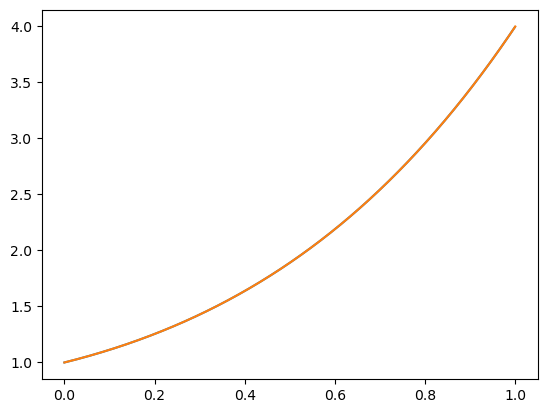

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def fx(x, y):
    return (1 + 2*x) * np.sqrt(y)
def fx_analitik(x):
    return 1/4 * (x**2 + x + 2)**2
    
x = 0.0
y = 1.0
h = 0.001
xmax = 1.0
xx = []
yy = []

while x <= xmax:
    xx.append(x)
    yy.append(y)
    k1 = fx(x, y)
    k2 = fx(x + h/2, y + k1*h/2)
    k3 = fx(x + h/2, y + k2*h/2)
    k4 = fx(x+h, y + k3*h)
    y = y + (k1 + 2*k2 + 2*k3 + k4)*h/6
    x = x + h

plt.plot(xx, yy)
plt.plot(np.linspace(0,1,500), fx_analitik(np.linspace(0,1,500)))

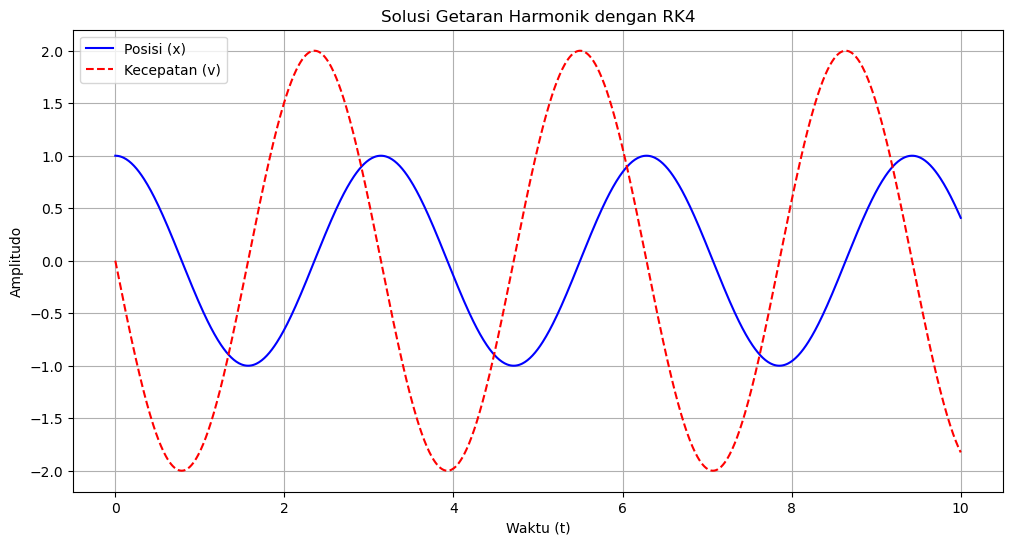

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def harmonic_oscillator(t, state, omega):
    """
    Fungsi sistem untuk getaran harmonik
    state[0] = x (posisi)
    state[1] = v (kecepatan)
    """
    x, v = state
    return np.array([v, -omega**2 * x])

def rk4_step(f, t, y, h, omega):
    """
    Satu langkah metode Runge-Kutta orde 4
    f: fungsi sistem
    t: waktu saat ini
    y: state saat ini [x, v]
    h: ukuran langkah waktu
    omega: parameter sistem (frekuensi angular)
    """
    k1 = f(t, y, omega)
    k2 = f(t + 0.5*h, y + 0.5*h*k1, omega)
    k3 = f(t + 0.5*h, y + 0.5*h*k2, omega)
    k4 = f(t + h, y + h*k3, omega)
    
    return y + h*(k1 + 2*k2 + 2*k3 + k4)/6

def solve_harmonic_oscillator(omega, t_span, y0, n_steps):
    """
    Menyelesaikan persamaan getaran harmonik menggunakan RK4
    omega: frekuensi angular
    t_span: [t_awal, t_akhir]
    y0: kondisi awal [x0, v0]
    n_steps: jumlah langkah waktu
    """
    t = np.linspace(t_span[0], t_span[1], n_steps)
    h = (t_span[1] - t_span[0])/(n_steps - 1)
    
    # Inisialisasi array untuk menyimpan solusi
    y = np.zeros((n_steps, 2))
    y[0] = y0
    
    # Iterasi RK4
    for i in range(n_steps-1):
        y[i+1] = rk4_step(harmonic_oscillator, t[i], y[i], h, omega)
    
    return t, y

# Parameter sistem
omega = 2.0  # frekuensi angular
t_span = [0, 10]  # rentang waktu
y0 = [1.0, 0.0]  # kondisi awal: x(0) = 1, v(0) = 0
n_steps = 1000

# Menyelesaikan persamaan
t, solution = solve_harmonic_oscillator(omega, t_span, y0, n_steps)

# Membuat plot
plt.figure(figsize=(12, 6))
plt.plot(t, solution[:, 0], 'b-', label='Posisi (x)')
plt.plot(t, solution[:, 1], 'r--', label='Kecepatan (v)')
plt.grid(True)
plt.xlabel('Waktu (t)')
plt.ylabel('Amplitudo')
plt.title('Solusi Getaran Harmonik dengan RK4')
plt.legend()
plt.show()